In [95]:
import numpy as np
import pylab as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.autograd import Variable

np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Generate data

In [96]:
n = 2500    # number of data points
d = 1       # number of features
t = 1       # number of targets
x_train = np.random.uniform(0, 1, (n, d)).astype(np.float32)
noise   = np.random.uniform(-0.1, 0.1, (n, d)).astype(np.float32)
y_train = np.sin(2*np.pi*x_train) + noise
x_test  = np.linspace(0, 1, n).reshape(-1, d).astype(np.float32)

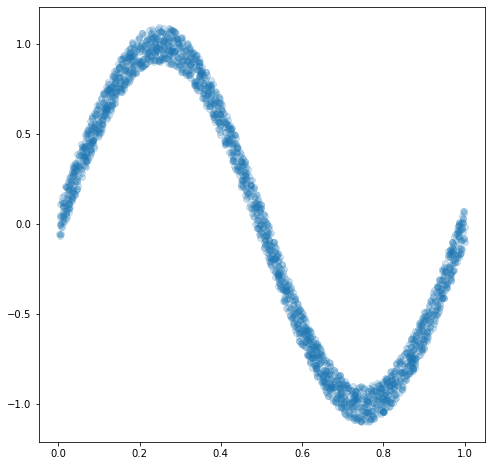

In [97]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_train, y_train, 'o', alpha=0.2)
plt.show()

# Train a model

In [98]:
# define a simple neural net
h = 10  # number of hidden units
w1 = Variable(torch.randn(d, h) * np.sqrt(1/d), requires_grad=True)
b1 = Variable(torch.zeros(1, h), requires_grad=True)
w2 = Variable(torch.randn(h, t) * np.sqrt(1/h), requires_grad=True)
b2 = Variable(torch.zeros(1, t), requires_grad=True)

def forward(x):
    out = torch.tanh(x.mm(w1) + b1)
    out = out.mm(w2) + b2
    return out

# wrap up the data as Variables
x = Variable(torch.from_numpy(x_train))
y = Variable(torch.from_numpy(y_train))

# select an optimizer
opt = optim.Adam([w1, b1, w2, b2], lr=0.02)

# optimize
for e in range(1000):
    opt.zero_grad()
    y_pred = forward(x)
    loss = F.mse_loss(y_pred, y)
    print(e, loss.data.numpy(), end='\r')
    loss.backward()
    opt.step()

In [99]:
# predict
y_test = forward(Variable(torch.from_numpy(x_test)))

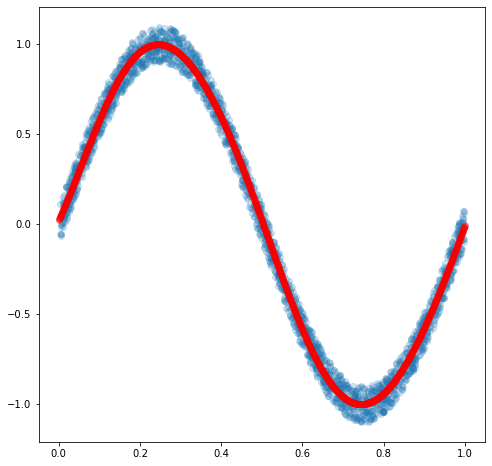

In [100]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_train, y_train, 'o', alpha=0.2)
plt.plot(x_test,  y_test.data.numpy(), 'ro', alpha=0.2)
plt.show()